## Setup

In [1]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\OneDrive - Montana State University\\python projects\\py binary orbit\\paper_QPE2005\\..']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf
from src.orbit.mapping.single_mode.WD_MBH import s_map_WDBH_TS_expo_2

### Initial parameters

In [3]:
mWD = 0.5*msun
mBH = 1.e5*msun
Torb = 9.*3600
a0 = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2

In [4]:
w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

In [5]:
# rt_factor = 2.6
rt_factor = 2.7
rp = rt*rt_factor

In [6]:
# sigma = 2.e-4
# # sigma = 3.e-5
# mu1 = [1., 1.2**2]
# ga = 1.
# alpha = 1.43

sigma = 5.e-4
mu1 = 1.0
ga = 1.
alpha = 1.43

sigDT = 2.e-4
mu1DT = [1., 1.2**2]

In [7]:
ntot = 1500

In [8]:
Lacc_eff = 0.1

def P_min(rp):
    return 2*np.pi*rp**3/np.sqrt(G*m2*(2*r1)**3)

def find_Lacc(m1,m2,a,e,sigma):
    rp = np.abs(a*(1-e))
    ga = np.exp(alpha*(2.-rp/rtide(m1,m2)))
    # ga = np.where(np.exp(alpha*(2.-rp/rtide(m1,m2))) < 1., np.exp(alpha*(2.-rp/rtide(m1,m2))), 1.)
    return sigma*m1*c**2/P_min(rp)/3 * ga *Lacc_eff

print(find_Lacc(m1,m2,a0,1-rp/a0,sigma))

6.580119651036895e+43


## Mapping

In [9]:
# qn_a, an_a, en_a, m1n_a, m2n_a = s_map_WDBH_TS_expo(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp,sigma,ga,mu1[0],ntot\
#                                         ,alpha = alpha, m1_min = 0.1, ts_factor=1.\
#                                         ,flag_vary_rp = True, flag_print_msg = True)
# n_list_a = np.array([i+1 for i in range(len(qn_a))])
qn_a, an_a, en_a, m1n_a, m2n_a = s_map_WDBH_TS_expo_2(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp
                                        ,sigma,ga,mu1, sigDT, mu1DT[0],ntot\
                                        ,alpha = alpha, q_break = 0.0316, m1_min = 0.1\
                                        ,e_protect = 1.e-4 ,flag_vary_rp = True, flag_print_msg = True)
n_list_a = np.array([i+1 for i in range(len(qn_a))])

e > 1


In [10]:
# qn_b, an_b, en_b, m1n_b, m2n_b = s_map_WDBH_TS_expo(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp,sigma,ga,mu1[1],ntot\
#                                         ,alpha = alpha, m1_min = 0.1, ts_factor=1.\
#                                         ,flag_vary_rp = True, flag_print_msg = True)
# n_list_b = np.array([i+1 for i in range(len(qn_b))])
qn_b, an_b, en_b, m1n_b, m2n_b = s_map_WDBH_TS_expo_2(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp
                                        ,sigma,ga,mu1, sigDT, mu1DT[1],ntot\
                                        ,alpha = alpha, q_break = 0.0316, m1_min = 0.1\
                                        ,e_protect = 1.e-4 ,flag_vary_rp = True, flag_print_msg = True)
n_list_b = np.array([i+1 for i in range(len(qn_b))])

e > 1


In [11]:
time_a = np.empty_like(qn_a, dtype=np.float64)
for idx, q in enumerate(qn_a[:-1]):
    p0 = 2*np.pi*np.sqrt(an_a[idx]**3/G/(m1n_a[idx]+m2n_a[idx]))
    p1 = 2*np.pi*np.sqrt(an_a[idx+1]**3/G/(m1n_a[idx+1]+m2n_a[idx+1]))
    if an_a[idx+1] < 0.:
        p1 = 0.
    time_a[idx+1] = time_a[idx] + (p0+p1)/2

C:\Users\vince\AppData\Local\Temp\ipykernel_24416\1876008616.py:4: RuntimeWarning: invalid value encountered in sqrt
  p1 = 2*np.pi*np.sqrt(an_a[idx+1]**3/G/(m1n_a[idx+1]+m2n_a[idx+1]))


### Plots

In [12]:
nbreak_a = len(qn_a)
# for idx, q in enumerate(qn_a):
#     if (np.abs(q)**2-0.1 > 0):
#         nbreak_a = idx
#         break

nbreak_b = len(qn_b)
# for idx, q in enumerate(qn_b):
#     if (np.abs(q)**2-0.1 > 0):
#         nbreak_b = idx
#         break
print(nbreak_a, len(qn_a))
print(nbreak_b, len(qn_b))

223 223
565 565


<Figure size 860x640 with 0 Axes>

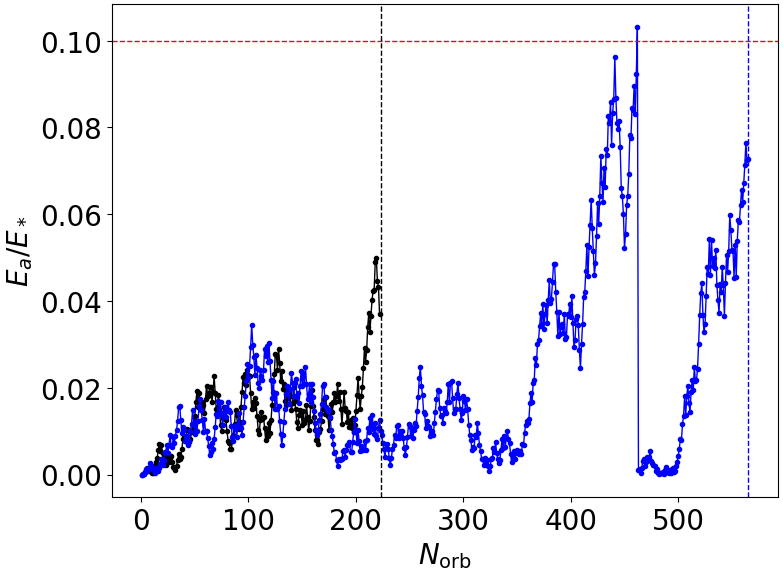

In [13]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
_, ax = plt.subplots(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(n_list_a[:nbreak_a], np.abs(qn_a[:nbreak_a])**2, linestyle = 'solid', marker = '.', color='black', label = r'$\sigma_3 = M_2/M_1$')
plt.plot(n_list_b[:nbreak_b], np.abs(qn_b[:nbreak_b])**2, linestyle = 'solid', marker = '.', color='blue', label = r'$\sigma_3 = 1.44M_2/M_1$')
plt.axhline(0.1, color = 'red', linestyle = 'dashed')
plt.axvline(nbreak_a, color = 'black', linestyle = 'dashed')
plt.axvline(nbreak_b, color = 'blue', linestyle = 'dashed')
plt.xlabel(r'$N_\text{orb}$',fontsize=20)
plt.ylabel(r'$E_a/E_*$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(frameon = 'True', fontsize = 20)
plt.savefig('Emode_vs_ntot_DTS.pdf', format="pdf")
plt.show()
plt.close()

C:\Users\vince\AppData\Local\Temp\ipykernel_24416\1622433997.py:4: RuntimeWarning: invalid value encountered in power
  plt.plot(n_list_a[:nbreak_a], (an_a[:nbreak_a]/an_a[0])**1.5*np.sqrt((m1n_a[0]+m2n_a[0])/(m1n_a[:nbreak_a]+m2n_a[:nbreak_a])), linestyle = 'solid', marker = '.', color='black', label = r'$\sigma_3 = M_2/M_1$')


<Figure size 860x640 with 0 Axes>

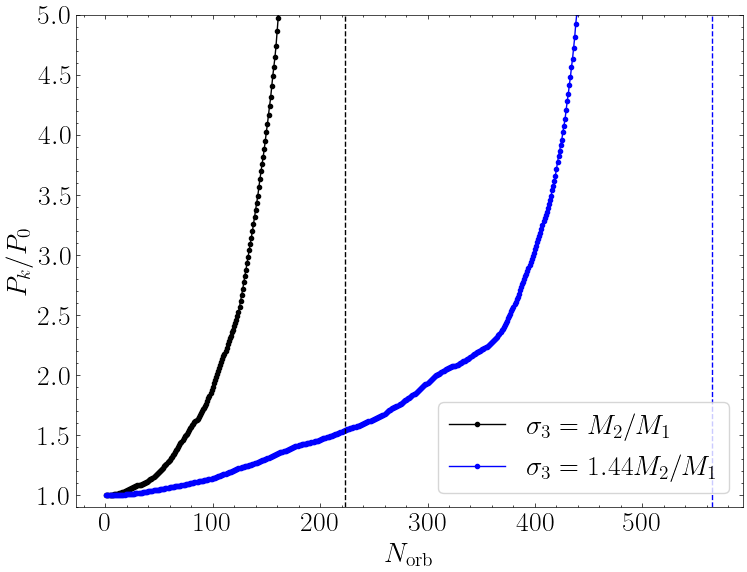

In [14]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
_, ax = plt.subplots(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(n_list_a[:nbreak_a], (an_a[:nbreak_a]/an_a[0])**1.5*np.sqrt((m1n_a[0]+m2n_a[0])/(m1n_a[:nbreak_a]+m2n_a[:nbreak_a])), linestyle = 'solid', marker = '.', color='black', label = r'$\sigma_3 = M_2/M_1$')
plt.plot(n_list_b[:nbreak_b], (an_b[:nbreak_b]/an_b[0])**1.5*np.sqrt((m1n_b[0]+m2n_b[0])/(m1n_b[:nbreak_b]+m2n_b[:nbreak_b])), linestyle = 'solid', marker = '.', color='blue', label = r'$\sigma_3 = 1.44M_2/M_1$')
plt.axvline(nbreak_a, color = 'black', linestyle = 'dashed')
plt.axvline(nbreak_b, color = 'blue', linestyle = 'dashed')
plt.xlabel(r'$N_\text{orb}$',fontsize=20)
plt.ylabel(r'$P_k/P_0$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([time_27-50., time_27+25.])
plt.ylim([0.9, 5.])
plt.legend(frameon = 'True', fontsize = 20, loc = 'lower right')
plt.savefig('period_vs_ntot_DTS.pdf', format="pdf")
plt.show()
plt.close()

<Figure size 860x640 with 0 Axes>

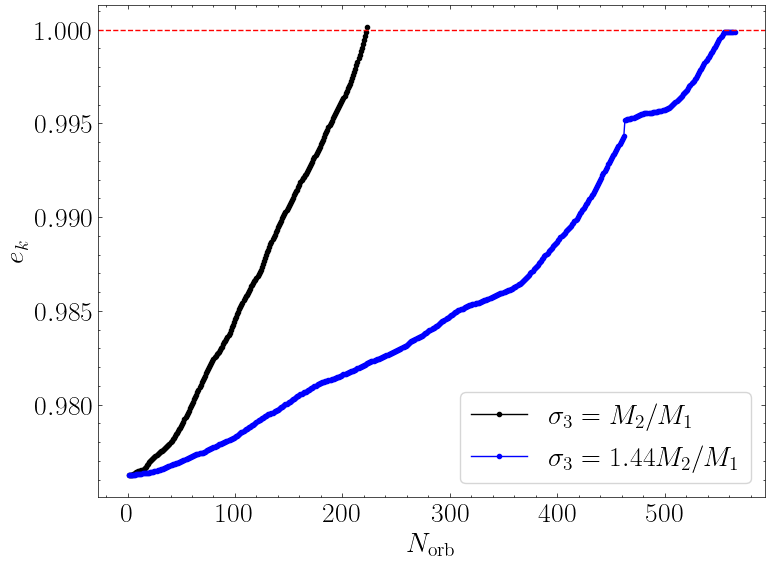

In [15]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
_, ax = plt.subplots(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(n_list_a[:nbreak_a], en_a[:nbreak_a], linestyle = 'solid', marker = '.', color='black', label = r'$\sigma_3 = M_2/M_1$')
plt.plot(n_list_b[:nbreak_b], en_b[:nbreak_b], linestyle = 'solid', marker = '.', color='blue', label = r'$\sigma_3 = 1.44M_2/M_1$')
plt.axhline(1.00, color = 'red', linestyle = 'dashed')
plt.xlabel(r'$N_\text{orb}$',fontsize=20)
plt.ylabel(r'$e_k$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon = 'True', fontsize = 20, loc = 'lower right')
plt.show()
plt.close()